<a href="https://colab.research.google.com/github/ttogle918/ds-section2-sprint1/blob/main/n212-multiple-regression/n212a-multiple-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **훈련데이터 샘플의 갯수를 과제 제출폼에 제출하세요.**

In [3]:
### 이곳에서 과제를 진행해 주세요 ###
import numpy as np
test = df[df['date'] > '2015-01-01']
train = df.drop(test.index)
train.shape

(14633, 21)

In [4]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [5]:
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7,2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- 정규화(normalize) 등 추가적인 데이터처리 없이 진행합니다.
- **테스트세트의 MAE 값을 과제 제출폼에 제출하세요.**

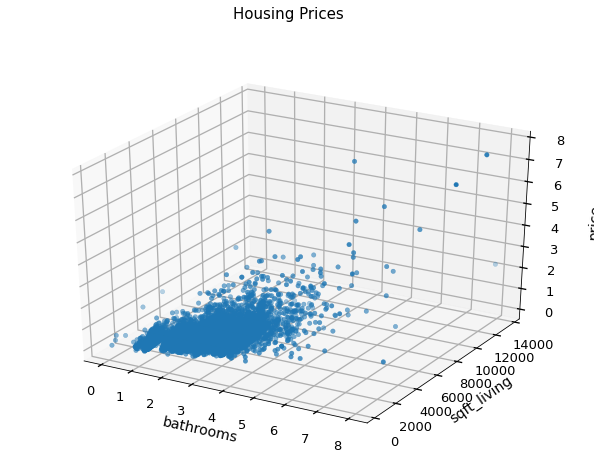

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter(train['bathrooms'], train['sqft_living'], train['price'])
ax.set_xlabel('bathrooms', labelpad=12)
ax.set_ylabel('sqft_living', labelpad=10)
ax.set_zlabel('price', labelpad=20)

plt.suptitle('Housing Prices', fontsize=15)
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
features = ['bathrooms', 
            'sqft_living']
X_train = train[features]
X_test = test[features]

# label 정의
target = 'price'
y_train = train[target]
y_test = test[target]

In [15]:
# SalePrice 평균값으로 예측(기준모델)
predict = y_train.mean()
# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 233570.83


In [17]:
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 233990.69


In [18]:
# 모델 fit
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 170777.34


In [19]:
# 테스트 데이터에 적용해 봅시다 
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 179252.53


### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **sqft_living의 회귀계수를 과제 제출폼에 제출하세요.**

In [20]:
model.intercept_, model.coef_

(-50243.56279640319, array([-5158.92591411,   286.13753555]))

### 4) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **테스트 데이터에 대한 R^2 값을 과제 제출폼에 제출하세요.**

In [27]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print("MSE : ", mse)
print("RMSE : ", np.sqrt(mse))

MSE :  71083994178.75656
RMSE :  266615.81757044455


In [28]:
print("MAE : ", mean_absolute_error(y_test, y_pred))

MAE :  179252.52593261775


In [29]:
print("R^2 : ", r2_score(y_test, y_pred))

R^2 :  0.45999300199894533


## 🔥도전과제

### 공지로 안내드리는 Github - Discussion 페이지에 올려 보세요:)

### 5)  EDA를 진행하시고, 두개 이상의 특성을 선택하여 특성공학(feature engineering)을 진행한 후 아래의 질문들에 대한 본인만의 리포트를 작성해보시고 서로 논해 보세요. 
- 어떤 이유에서 해당 특성공학을 진행하셨나요? 특성공학을 통해 기대하는 효과는 무엇이었나요? 만약 얻고자 하는 효과를 얻지 못했다면 이유는 무엇이며 어떤 액션을 추가할 수 있을까요? 
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어는 어떠한가요? 해당 결과를 통해 얻을 수 있는 인사이트는 어떤 것이 있었나요? 
- 만들어진 회귀계수를 사용해 모델을 설명해 본다면? 
- 만들어진 모델은 과소적합인가요? 과대적합인가요? 일반화가 잘 된 모델을 만들기 위해 추가로 할 수 있는 액션은 어떤 것이 있을까요? 

※kaggle notebook에서도 힌트를 얻어 보세요. 

## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)